In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [144]:
df_happiness = pd.read_csv("../Mental health 2023./CSV/World Happiness Report 2005-2021.csv")
df_happiness.shape

(2089, 12)

In [145]:
df_disorders = pd.read_csv("../Mental health 2023./CSV/mental_disorders_data.csv")
df_disorders.shape

(6468, 11)

In [146]:
merged_df = pd.merge(df_happiness, df_disorders, 
                     left_on=['Year', 'Country name'], 
                     right_on=['Year', 'Entity'], 
                     how='inner')

merged_df.drop('Code', axis=1, inplace=True)

merged_df.info()  
merged_df.head()  

# merged_df.to_csv('full_dataset.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       1474 non-null   object 
 1   Year                               1474 non-null   int64  
 2   Life Ladder                        1474 non-null   float64
 3   Log GDP per capita                 1469 non-null   float64
 4   Social support                     1461 non-null   float64
 5   Healthy life expectancy at birth   1474 non-null   float64
 6   Freedom to make life choices       1447 non-null   float64
 7   Generosity                         1419 non-null   float64
 8   Perceptions of corruption          1387 non-null   float64
 9   Positive affect                    1454 non-null   float64
 10  Negative affect                    1462 non-null   float64
 11  Confidence in national government  1320 non-null   float

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,Confidence in national government,index,Entity,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,...,0.612072,18,Afghanistan,0.164639,0.704480,0.093589,4.860437,2.483862,4.129656,0.659501
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,...,0.611545,19,Afghanistan,0.164932,0.704925,0.095166,4.861533,2.543884,4.129972,0.661185
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,...,0.299357,20,Afghanistan,0.165130,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,...,0.307386,21,Afghanistan,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,...,0.435440,22,Afghanistan,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372


In [147]:
są_identyczne = (merged_df['Country name'] == merged_df['Entity']).all()
print(są_identyczne)

merged_df.drop('Entity', axis=1, inplace=True)
merged_df.drop('index', axis=1, inplace=True)

merged_df.info()  
merged_df.head()  

# merged_df.to_csv('full_dataset.csv', index=False)

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       1474 non-null   object 
 1   Year                               1474 non-null   int64  
 2   Life Ladder                        1474 non-null   float64
 3   Log GDP per capita                 1469 non-null   float64
 4   Social support                     1461 non-null   float64
 5   Healthy life expectancy at birth   1474 non-null   float64
 6   Freedom to make life choices       1447 non-null   float64
 7   Generosity                         1419 non-null   float64
 8   Perceptions of corruption          1387 non-null   float64
 9   Positive affect                    1454 non-null   float64
 10  Negative affect                    1462 non-null   float64
 11  Confidence in national government  1320 non-null   

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072,0.164639,0.704480,0.093589,4.860437,2.483862,4.129656,0.659501
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545,0.164932,0.704925,0.095166,4.861533,2.543884,4.129972,0.661185
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357,0.165130,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372


                                       Year  Life Ladder  Log GDP per capita  \
Year                               1.000000    -0.019409            0.047618   
Life Ladder                       -0.019409     1.000000            0.790530   
Log GDP per capita                 0.047618     0.790530            1.000000   
Social support                    -0.051927     0.699423            0.674149   
Healthy life expectancy at birth   0.102248     0.709192            0.806806   
Freedom to make life choices       0.134055     0.526599            0.343724   
Generosity                         0.000935     0.240479            0.040876   
Perceptions of corruption         -0.064958    -0.442865           -0.332915   
Positive affect                    0.000295     0.521183            0.246155   
Negative affect                    0.180345    -0.259320           -0.123318   
Confidence in national government -0.008026    -0.084500           -0.204193   
Schizophrenia (%)                 -0.004

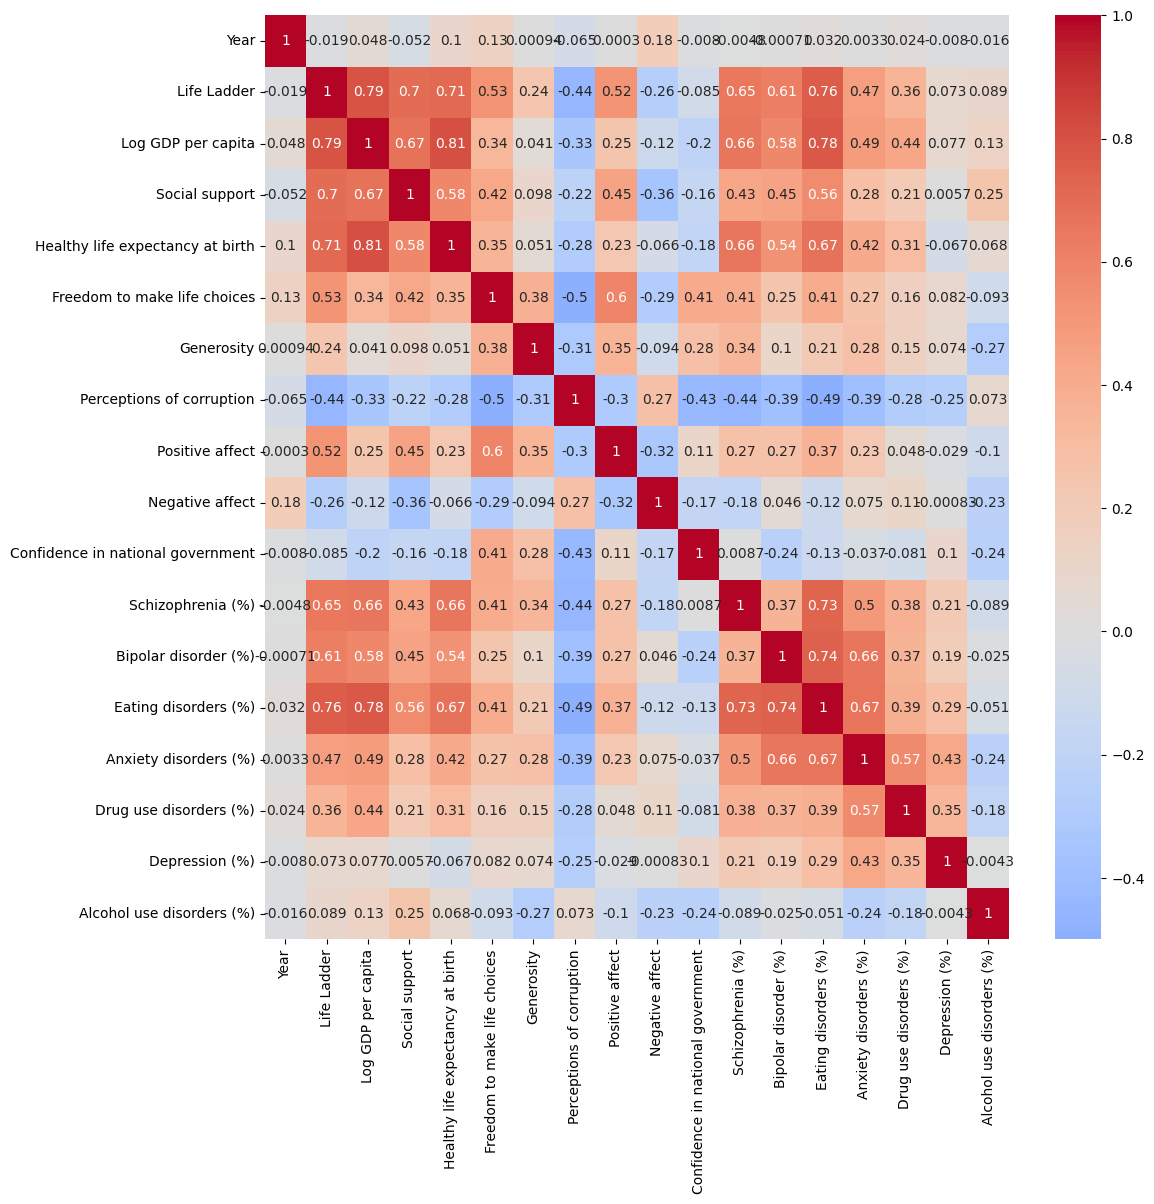

In [148]:
df_liczbowe = merged_df.select_dtypes(include=['float64', 'int64'])
korelacja = df_liczbowe.corr()
print(korelacja)
plt.figure(figsize=(12, 12)) 
sns.heatmap(korelacja, annot=True, cmap='coolwarm', center=0)
plt.show()

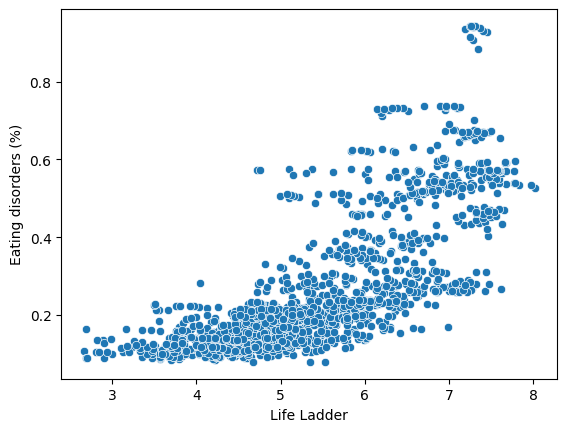

In [149]:
sns.scatterplot(data=merged_df, x='Life Ladder', y='Eating disorders (%)')

plt.show()

Współczynniki regresji (coef_):
[ 0.02498133  0.07430861 -0.00550247  0.00039628  0.00083699  0.07587282
 -0.30411601  0.13847089  0.20795493 -0.13790486]
Wyraz wolny (intercept_):
-0.42948979370988516
MSE: 0.00932656530974633


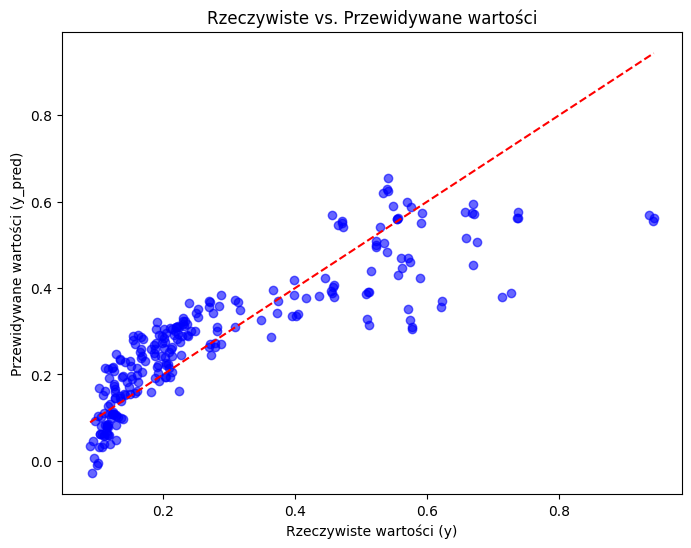

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cleared_df = merged_df.dropna(subset=[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity', 
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'])

X = cleared_df[[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government']]
y = cleared_df['Eating disorders (%)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("Współczynniki regresji (coef_):")
print(model.coef_)

print("Wyraz wolny (intercept_):")
print(model.intercept_)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.title('Rzeczywiste vs. Przewidywane wartości')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()
